# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs4/20250228_sparc4acs4_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs4/20250228_s4c4_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs4/20250228_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs4/20250228_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs4/20250228_s4c4_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:36.948000,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:38.068073,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:39.188146,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:40.308218,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:41.428291,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:01:58.221000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
1517,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:03:40.746000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,2,L4,None,True
1518,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:05:23.148000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,3,L4,None,True
1519,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:07:05.751000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,4,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs4/20250228_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   71R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   71R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   71R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   71R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   71R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

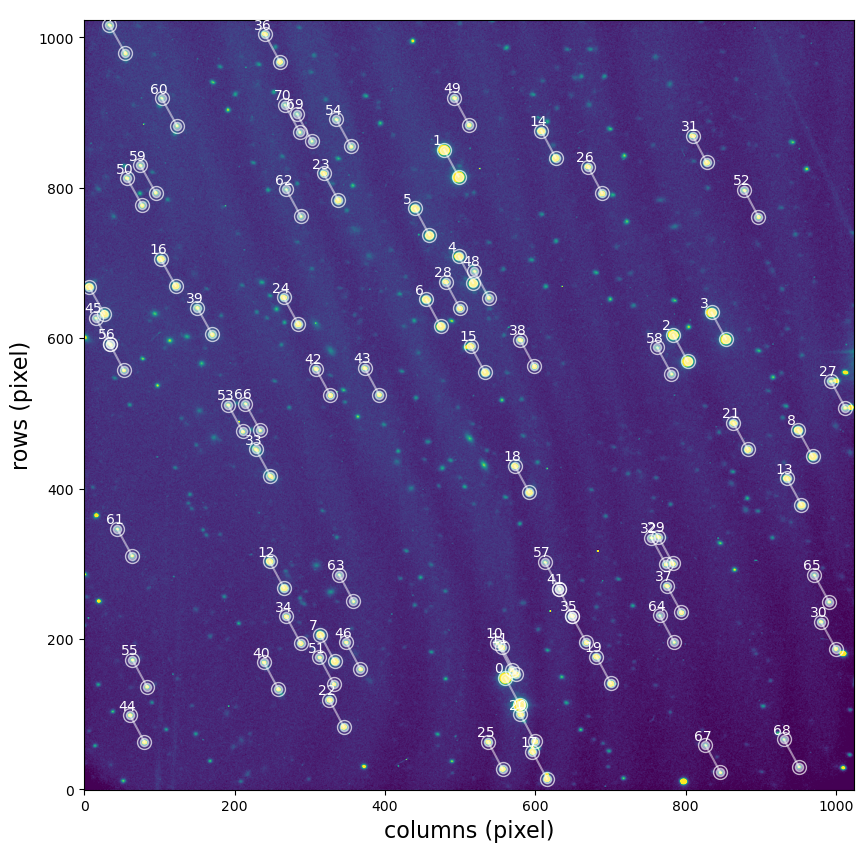

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553066,-38.759719,579.215618,112.708087,4.703004,4.703004,-10.341770,0.001189,-9.694519,0.000462,10,0
1,1,189.564736,-38.693895,497.903013,814.938037,5.169414,5.169414,-9.870023,0.001631,-9.711823,0.000448,10,0
2,2,189.527382,-38.716382,802.469246,569.373894,5.209730,5.209730,-9.512317,0.002111,-9.702491,0.000491,10,0
3,3,189.521325,-38.713494,853.365032,598.946734,5.239783,5.239783,-9.325775,0.002418,-9.703311,0.000476,10,0
4,4,189.562005,-38.707184,517.328218,673.423059,5.056724,5.056724,-8.580548,0.004361,-9.708949,0.000498,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,66,189.595680,-38.726175,233.785896,477.632421,4.429471,4.429471,-5.598065,0.059415,-9.710763,0.000438,10,0
67,67,189.520756,-38.767557,846.028138,22.629897,4.431456,4.431456,-5.514397,0.063383,-9.677491,0.000457,10,0
68,68,189.508226,-38.766604,950.481784,30.190189,4.121164,4.121164,-5.569412,0.060592,-9.675316,0.000482,10,0
69,69,189.588425,-38.689820,302.733014,862.127979,4.899269,4.899269,-4.873699,0.116637,-9.716699,0.000474,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

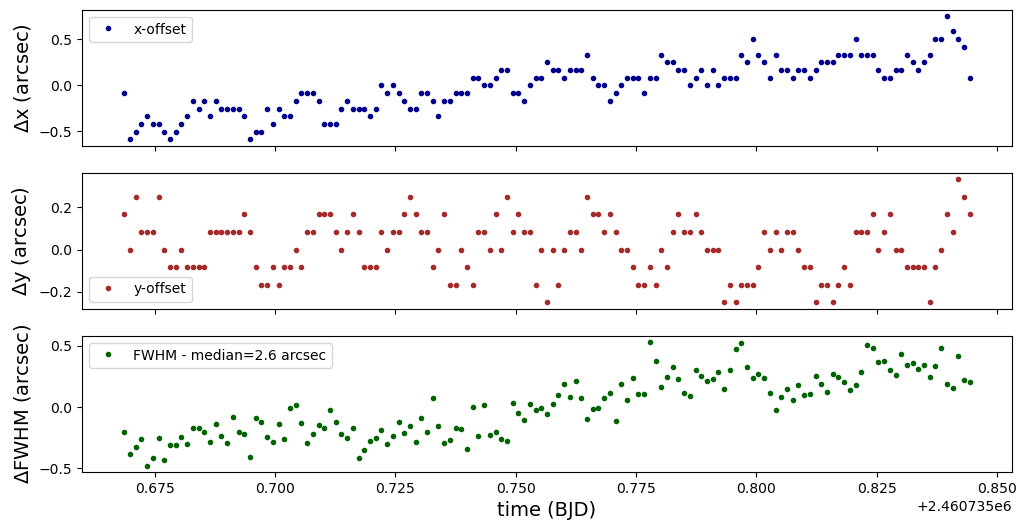

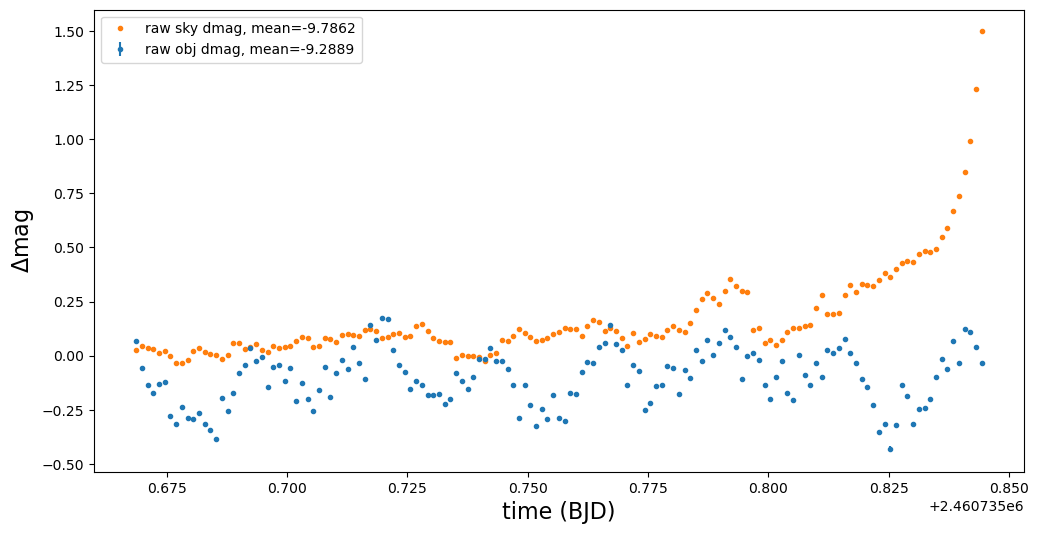

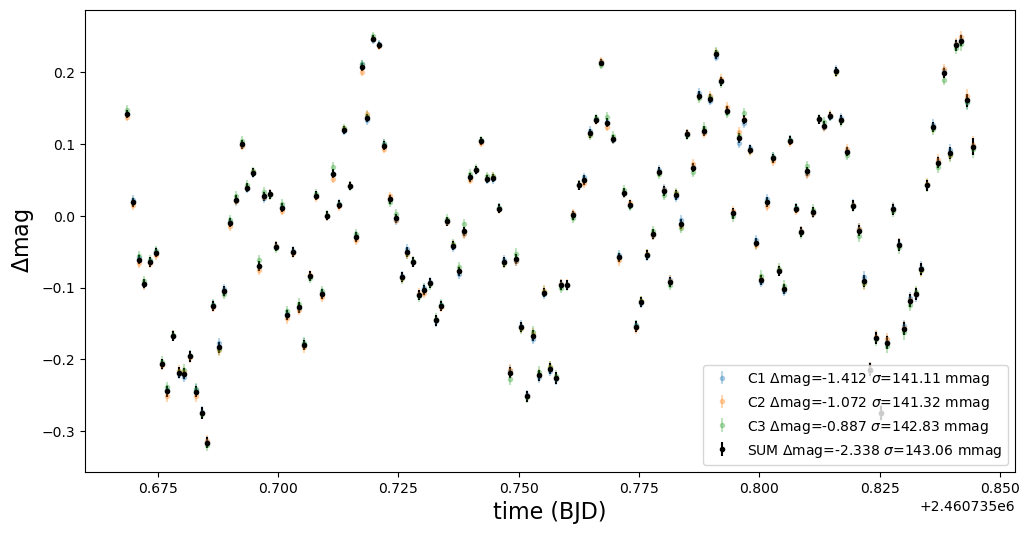

       TIME                x         ...      diffmagsum     
------------------ ----------------- ... --------------------
2460735.6686871215 464.4715802876294 ...  0.14227898109914427
2460735.6698730513 462.9715802876294 ...  0.01899145421714188
2460735.6710589807 463.2215802876294 ... -0.06084636057546433
2460735.6722442275 463.4715802876294 ... -0.09435670589236977
2460735.6734288842 463.7215802876294 ... -0.06423091450512963
   2460735.6746142 463.4715802876294 ... -0.05123626830270034
2460735.6757995277 463.4715802876294 ... -0.20631449488654496
               ...               ... ...                  ...
2460735.8371981713 466.2215802876294 ...   0.0740783080105274
2460735.8383856965 466.2215802876294 ...  0.19920356030424813
2460735.8395719025 466.9715802876294 ...  0.08756790224877875
2460735.8407586063 466.4715802876294 ...  0.23782245674693314
 2460735.841943886 466.2215802876294 ...  0.24448527022235744
 2460735.843131493 465.9715802876294 ...  0.16097009960578212
 2460735

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=6
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs4/20250228_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     921   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1274   71R x 631C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0146', 'EFE0146', 'FO0147', 'EFO0147', 'FE0147', 'EFE0147', 'FO0148',
       'EFO0148', 'FE0148', 'EFE0148'],
      dtype='object', length=631)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:57:28,856 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:57:28,856 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:57:28,868 root - INFO - Source index: i=6   [pipeline_lib]


2025-09-18 00:57:28,868 | INFO | Source index: i=6 


2025-09-18 00:57:28,869 root - INFO - Source RA=189.56707189396778 Dec=-38.71267013076336 mag=-14.7353+-0.0007  [pipeline_lib]


2025-09-18 00:57:28,869 | INFO | Source RA=189.56707189396778 Dec=-38.71267013076336 mag=-14.7353+-0.0007


2025-09-18 00:57:28,870 root - INFO - Best aperture radius: 12.0 pixels  [pipeline_lib]


2025-09-18 00:57:28,870 | INFO | Best aperture radius: 12.0 pixels


2025-09-18 00:57:28,871 root - INFO - Polarization in Q: -0.0019+-0.0009  [pipeline_lib]


2025-09-18 00:57:28,871 | INFO | Polarization in Q: -0.0019+-0.0009


2025-09-18 00:57:28,872 root - INFO - Polarization in U: -0.003+-0.002  [pipeline_lib]


2025-09-18 00:57:28,872 | INFO | Polarization in U: -0.003+-0.002


2025-09-18 00:57:28,873 root - INFO - Polarization in V: -0.0003+-0.0008  [pipeline_lib]


2025-09-18 00:57:28,873 | INFO | Polarization in V: -0.0003+-0.0008


2025-09-18 00:57:28,874 root - INFO - Total linear polarization p: 0.003+-0.001  [pipeline_lib]


2025-09-18 00:57:28,874 | INFO | Total linear polarization p: 0.003+-0.001


2025-09-18 00:57:28,876 root - INFO - Angle of polarization theta: 120+-10 deg  [pipeline_lib]


2025-09-18 00:57:28,876 | INFO | Angle of polarization theta: 120+-10 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:57:28,877 root - INFO - Free constant k: 0.8092568168535247+-0.0  [pipeline_lib]


2025-09-18 00:57:28,877 | INFO | Free constant k: 0.8092568168535247+-0.0


2025-09-18 00:57:28,878 root - INFO - Zero of polarization: 30.2+-0.0  [pipeline_lib]


2025-09-18 00:57:28,878 | INFO | Zero of polarization: 30.2+-0.0


2025-09-18 00:57:28,879 root - INFO - RMS of zi residuals: 0.006873823027046893  [pipeline_lib]


2025-09-18 00:57:28,879 | INFO | RMS of zi residuals: 0.006873823027046893


2025-09-18 00:57:28,880 root - INFO - Reduced chi-square (n=149.0, DOF=146.0): 0.85  [pipeline_lib]


2025-09-18 00:57:28,880 | INFO | Reduced chi-square (n=149.0, DOF=146.0): 0.85


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:57:28,968 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:57:28,968 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:57:28,973 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:57:28,973 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:57:29,196 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:57:29,196 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:57:29,202 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:57:29,202 | INFO | Substituting symbol \perp from STIXGeneral


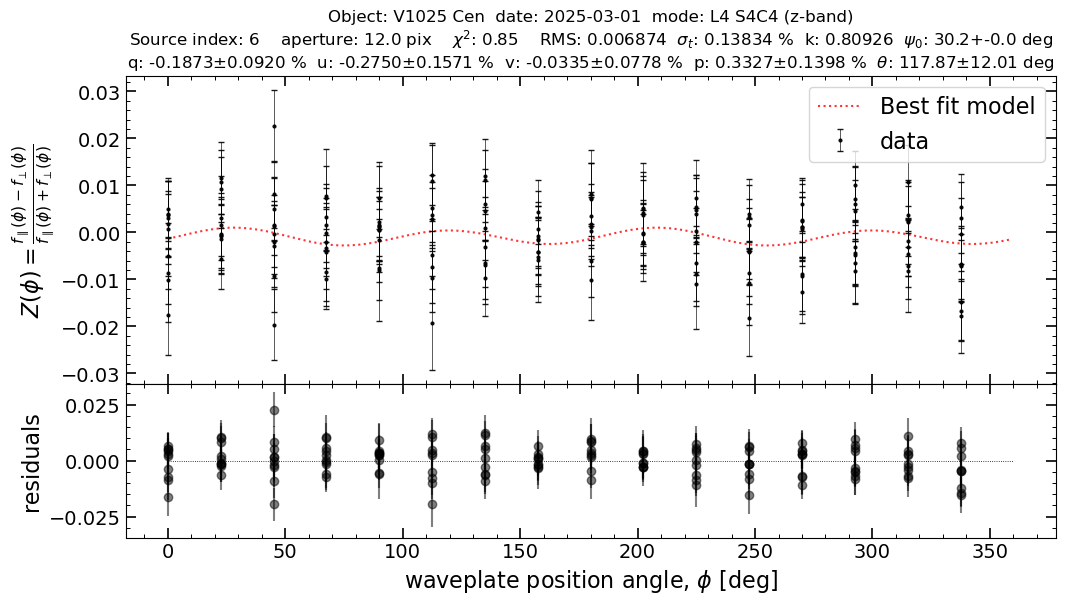

In [11]:
source_index = 6

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs4/20250228_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 6
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 4
APERTURE_RADIUS : 12.0
NEXPS : 149
MAG : -14.7353+-0.0007
RA : 189.56707189396778
DEC : -38.71267013076336
FWHM : 5.4967211267092395
X1 : 454.96515689552746
Y1 : 651.4510215465432
X2 : 473.97800367973144
Y2 : 616.1031237459509
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.3+-0.1 %  Angle of polarization: 120+-10 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

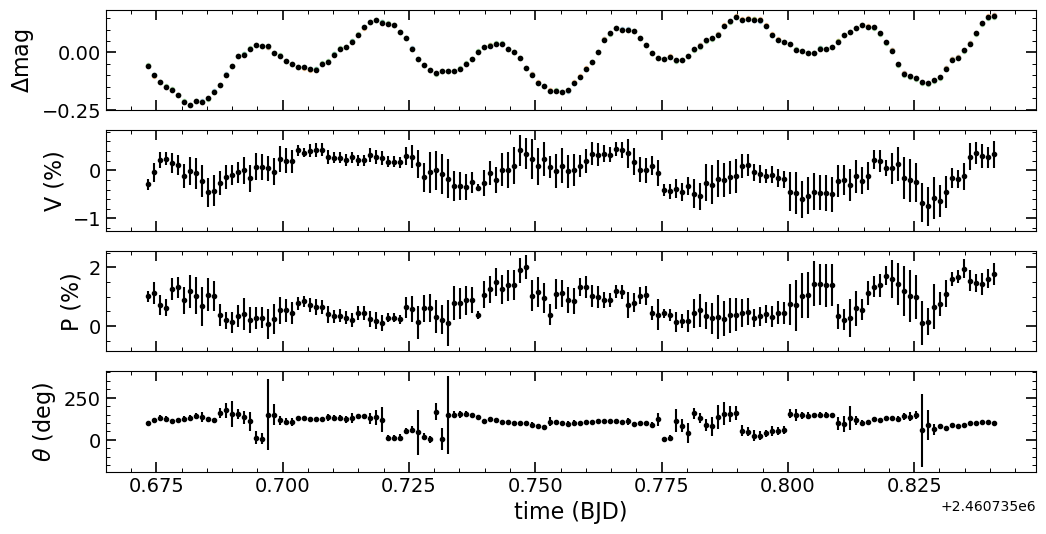

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.05757623222503838,0.0023824260058238045,-0.06097792322072326,0.002447283101171189,-0.056166346723706795,0.0025042372123725625,2460735.6734169777,454.96515689552746,651.4510215465432,473.97800367973144,616.1031237459509,4.764163583504318,-11.509639663176092,0.0022955860577772466,-13.912158238088168,0.001458494504738122,-0.058794537046813033,0.010064400229612813,0.0017364134147324522,102.35294620290227,4.934364942605095
-0.09899936580510271,0.0024575712820879736,-0.10177894886563355,0.002519992502056387,-0.09812358319750736,0.0025744215221908608,2460735.674603029,453.46515689552746,650.9510215465432,472.47800367973144,615.6031237459509,4.764163583504318,-11.468960841336319,0.002373878334578329,-13.912848155587662,0.0014531930184054369,-0.10016327638608047,0.011265313480141675,0.0038313701570753546,119.49752948226184,9.726954042203634
-0.12995035809621136,0.002510222898435476,-0.1312707353393412,0.0025709796902864406,-0.12847393400168272,0.002623851961793569,2460735.6757893525,453.71515689552746,651.7010215465432,472.72800367973144,616.3531237459509,4.774375303177665,-11.4392722285608,0.0024287052787122995,-13.91349775653625,0.0014491123809312232,-0.13050149011018775,0.007255935020216965,0.0034485142934109025,131.62919572073,13.592667039706026
-0.15061930224000264,0.0025479488044805472,-0.1504290740187857,0.0026084484276276327,-0.14838492791248825,0.0026603173562184195,2460735.6769746225,453.96515689552746,651.2010215465432,472.97800367973144,615.8531237459509,4.825198335374436,-11.419338318716397,0.0024678294769923995,-13.913563130262684,0.0014500992252622377,-0.1505007736810242,0.0062514077707466935,0.002852048280415826,126.3791035456341,13.048033948703644
-0.1632170036728322,0.0025724431051938907,-0.16330487087387002,0.002632485273576178,-0.161667041525428,0.0026837906332233597,2460735.6781607317,454.21515689552746,651.2010215465432,473.22800367973144,615.8531237459509,4.813744238338531,-11.407638697506721,0.002493264302755774,-13.914727233721072,0.0014495081089265314,-0.16336449834908784,0.012537989015826461,0.0036913924940152744,113.99928682511118,8.420315665899297
-0.18619648454222926,0.002625966370376582,-0.18705872473123275,0.0026847266432044347,-0.18463455460918432,0.0027355410495639165,2460735.6793472394,453.96515689552746,651.2010215465432,472.97800367973144,615.8531237459509,4.868643370652051,-11.384344672094894,0.0025485652537653885,-13.914651014901057,0.0014495126087168222,-0.18658230494090056,0.013168983215144375,0.0036893501860917302,115.99430976107634,8.012419303631612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.020650375531889864,0.0030242853759946033,-0.020776680658943114,0.0031150670878235696,-0.025945782949104768,0.0031861078555857868,2460735.833624865,455.71515689552746,650.9510215465432,474.72800367973144,615.6031237459509,6.205201037929712,-11.480056804851358,0.002914166628686419,-13.846388831381821,0.0018772657897253616,-0.022607988665200196,0.016825252905569552,0.0022791604216164433,83.26086290125909,3.8741758251165934
0.01227064042802084,0.0029719937960647003,0.012543908209877053,0.003066028248512423,0.006056439026396632,0.0031394399105199276,2460735.8348115794,455.71515689552746,650.9510215465432,474.72800367973144,615.6031237459509,6.244185862553387,-11.51427460990114,0.0028572181908613687,-13.847803289295907,0.0018969111538818205,0.010195358470495464,0.019529849489862867,0.003226754711304464,87.35708100147397,4.725340294670938


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=6, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)